In [1]:
from data.loader import load_segmentation_dataset, load_train_dataset
from models.u2net import U2NET

import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import keras

from keras.metrics import Accuracy, MeanSquaredError, MeanIoU, Precision, Recall

tf.debugging.disable_traceback_filtering()

In [2]:
TRAIN_DATASETS = ["DUTS-TR", "DIS5K/DIS-TR", "DIS-TE1", "DIS-TE2", "DIS-TE3", "DIS-TE4", "DIS-VD"]
TEST_PATH = "./datasets/DUTS-TE/"

IMAGE_SHAPE = (320, 320, 3)
MASK_SHAPE = (320, 320, 1)

# Training
BATCH_SIZE = 8
EPOCHS = 100
LEARNING_RATE = 0.001

In [3]:
def display(display_list, titles):
    assert len(display_list) == len(titles), "Размер списка изображений должен соотвествовать размеру списка заголовков"
    
    plt.figure(figsize=(12, 12))
    
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(titles[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.show()

In [4]:
train_dataset = load_train_dataset(
    dir_path = ["./datasets/{}/".format(i) for i in TRAIN_DATASETS],
    image_shape = IMAGE_SHAPE,
    mask_shape = MASK_SHAPE,
    batch=BATCH_SIZE,
)

test_dataset = load_segmentation_dataset(
    dir_path = TEST_PATH,
    image_shape = IMAGE_SHAPE,
    mask_shape = MASK_SHAPE
).batch(BATCH_SIZE)

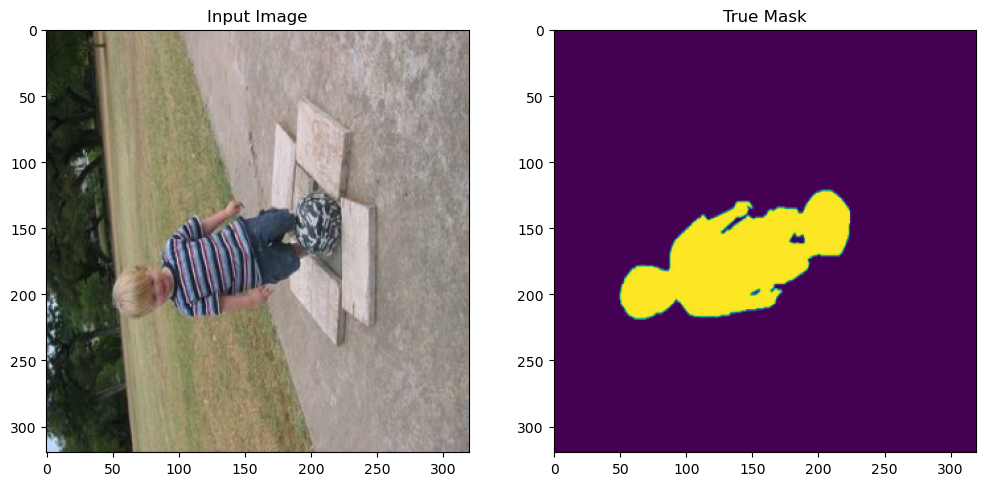

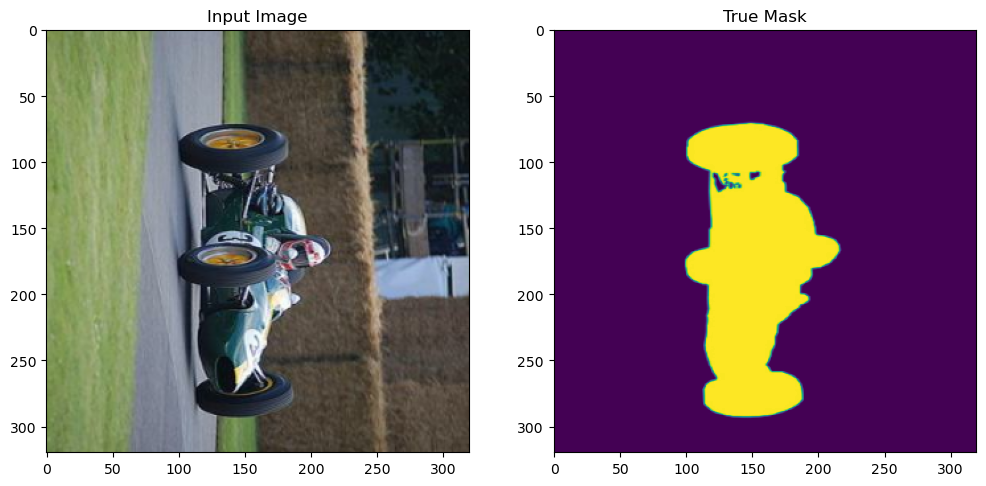

In [5]:
for images, masks in train_dataset.take(2):
  sample_image, sample_mask = images[0], masks[0]
  display([sample_image, sample_mask], ['Input Image', 'True Mask'])

In [6]:
# Изображение для отладки обучения
for images, masks in test_dataset.take(1):
    test_image_for_display = images[6]
    test_mask_for_display = masks[6]

In [30]:
class RoundedAccuracy(Accuracy):
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.math.round(y_pred)
        return super(RoundedAccuracy,self).update_state(y_true, y_pred, sample_weight)
    
class RoundedMeanIoU(MeanIoU):
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.math.round(y_pred)
        return super(RoundedMeanIoU,self).update_state(y_true, y_pred, sample_weight)
    
def FBetaScore(precision: float, recall: float, squared_beta: float = 0.3) -> float:
    return ((1 + squared_beta) * precision * recall)/(squared_beta * precision + recall)

In [8]:
adam = keras.optimizers.Adam(learning_rate=LEARNING_RATE, beta_1=.9, beta_2=.999, epsilon=1e-08)
bce = keras.losses.BinaryCrossentropy()

model = U2NET(shape_image=IMAGE_SHAPE)
model.compile(optimizer=adam, loss=bce, metrics=[
    [RoundedAccuracy(), MeanSquaredError(), RoundedMeanIoU(num_classes=2), Precision(0.5), Recall(0.5)]] + [None] * 6)

In [9]:
class DisplayCallback(tf.keras.callbacks.Callback):
    def __init__(self, image, mask, freq):
        super().__init__() 
        self.freq = freq
        self.image = image
        self.mask = mask
        
    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.freq == 0 or epoch == EPOCHS-1:
            out = self.model(tf.expand_dims(self.image, axis=0))
            print ('\nSample Prediction after epoch {}\n'.format(epoch + 1))
            display(
                [self.image, self.mask, out[0][0], tf.math.round(out[0][0])],
                ["Input image", "True mask", "Predicted mask", "Rounded mask"]
            )

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 1



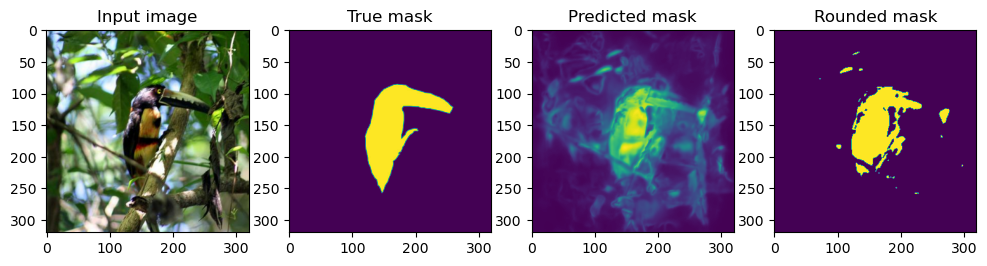

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 11



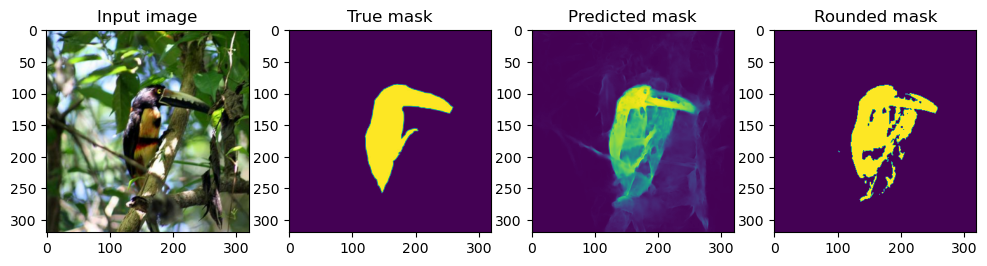

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 21



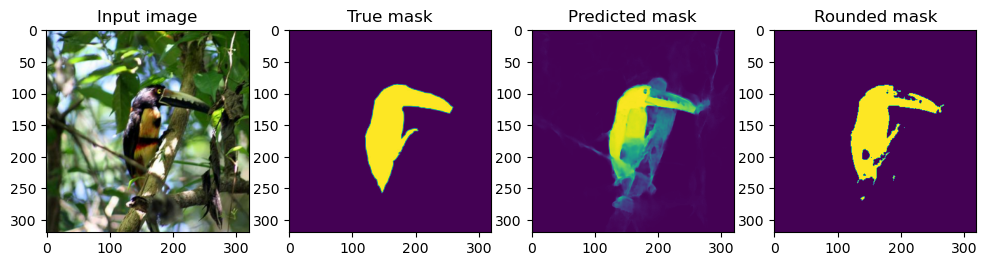

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 31



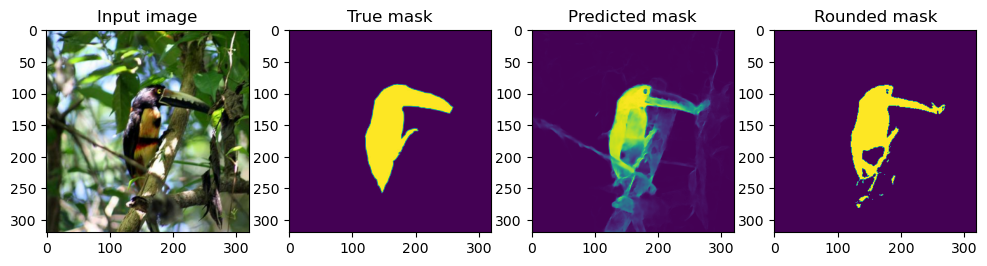

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 41



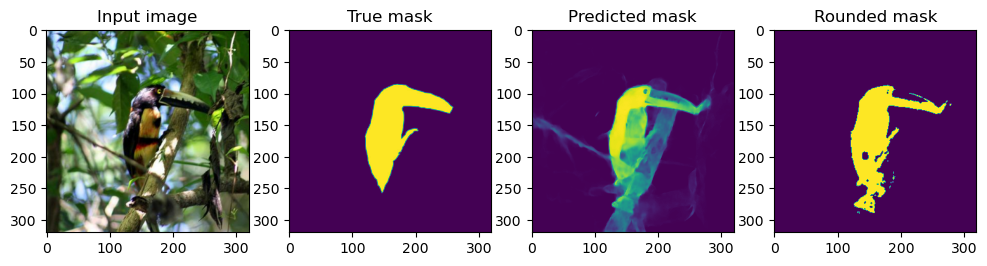


Sample Prediction after epoch 51



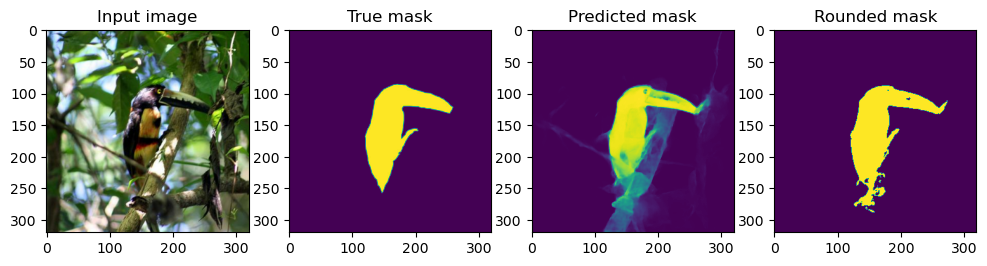


Sample Prediction after epoch 61



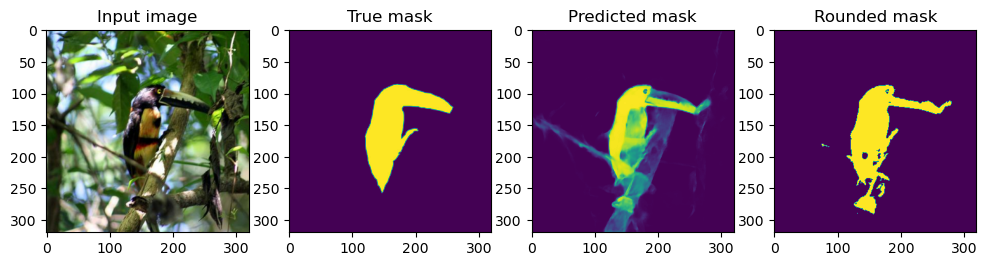

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 71



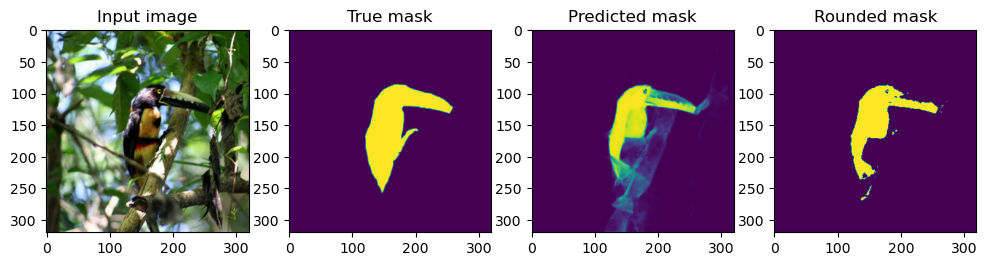

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 81



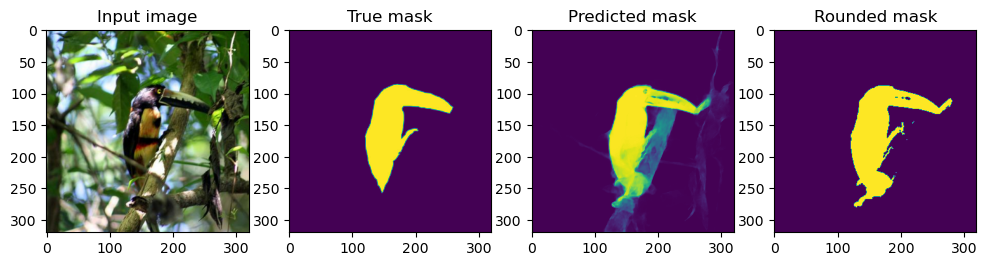


Sample Prediction after epoch 91



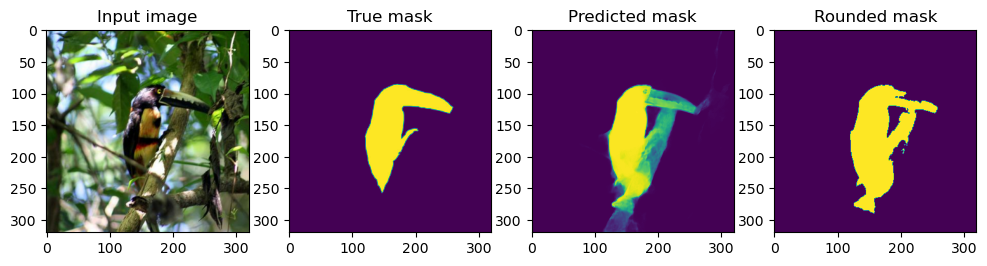

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 100



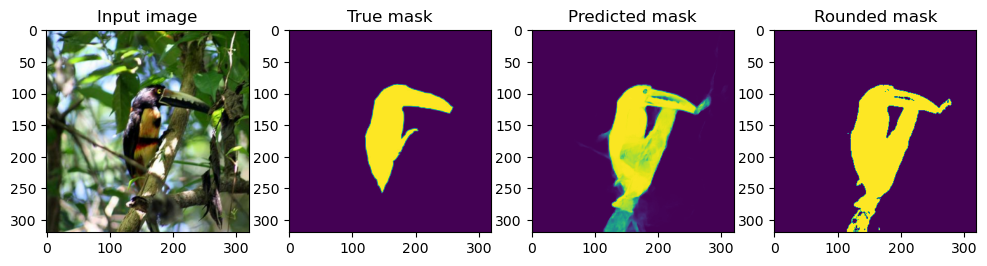

INFO:tensorflow:Assets written to: ./saved_models/u2net/latest\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net/latest\assets


In [10]:
callbacks = [
    keras.callbacks.TensorBoard(log_dir="./logs"),
    keras.callbacks.BackupAndRestore("./bkp"),
    keras.callbacks.ModelCheckpoint("./saved_models/u2net/best", monitor="val_activation_mean_squared_error", save_best_only=True),
    DisplayCallback(test_image_for_display, test_mask_for_display, 10),
]

history = model.fit(train_dataset, validation_data=test_dataset, callbacks=callbacks, epochs=EPOCHS, verbose=0)
model.save('./saved_models/u2net/latest', include_optimizer=False)

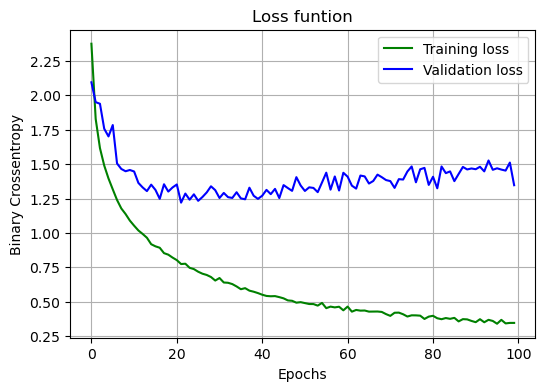

In [11]:
# loss outputs
plt.figure(figsize=(6, 4))
loss = history.history["loss"]
val_loss = history.history['val_loss']
    
plt.plot(history.epoch, loss, 'g', label='Training loss')
plt.plot(history.epoch, val_loss, 'b', label='Validation loss')
plt.title('Loss funtion')
plt.ylabel('Binary Crossentropy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

plt.show()

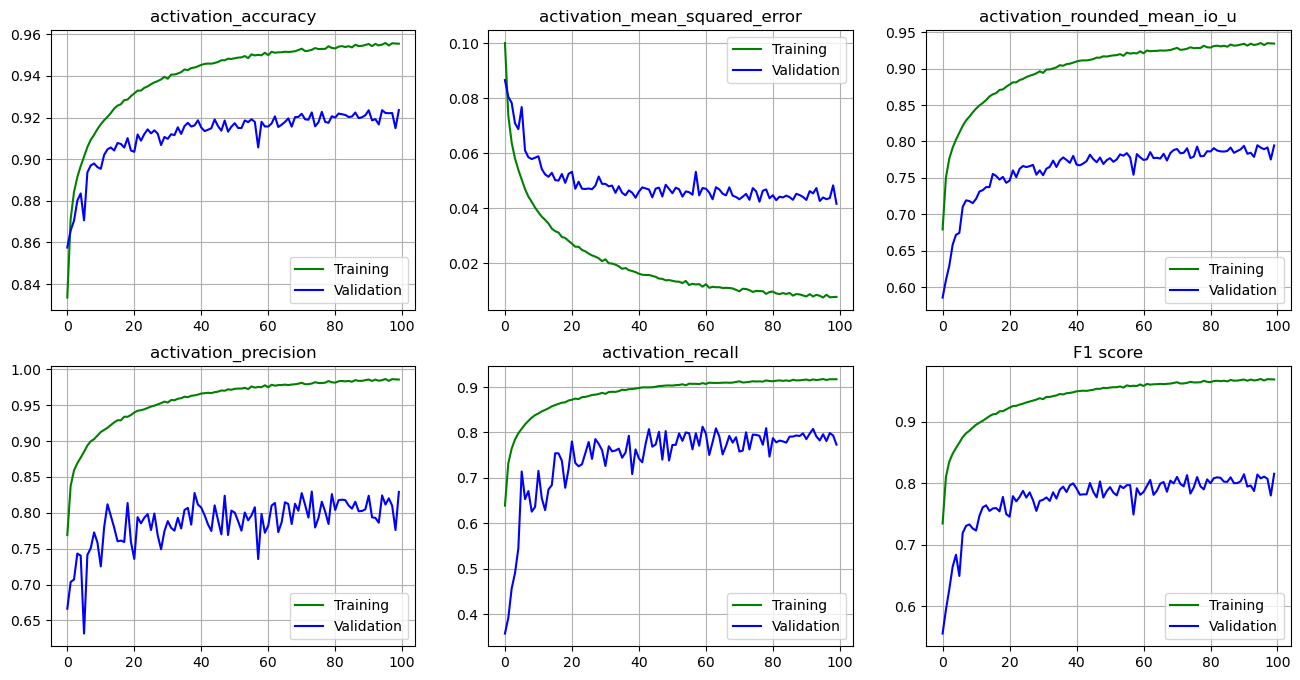

In [38]:
# metrics
metrics_titles_list = [
    "activation_accuracy", 
    "activation_mean_squared_error", 
    "activation_rounded_mean_io_u", 
    "activation_precision", 
    "activation_recall"
]

fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs = axs.ravel()

for i, metrics_name in enumerate(metrics_titles_list):
    metrics = history.history[metrics_name]
    val_metrics = history.history['val_' + metrics_name]
    
    axs[i].plot(history.epoch, metrics, 'g', label='Training')
    axs[i].plot(history.epoch, val_metrics, 'b', label='Validation')
    axs[i].set_title(metrics_name)
    axs[i].legend()
    axs[i].grid()
    
f1_scores = list(map(lambda x: FBetaScore(x[0], x[1], 0.3), zip(history.history['activation_precision'], history.history['activation_recall'])))
val_f1_scores = list(map(lambda x: FBetaScore(x[0], x[1], 0.3), zip(history.history['val_activation_precision'], history.history['val_activation_recall'])))
axs[5].plot(history.epoch, f1_scores, 'g', label='Training')
axs[5].plot(history.epoch, val_f1_scores, 'b', label='Validation')
axs[5].set_title('F1 score')
axs[5].legend()
axs[5].grid()

plt.show()

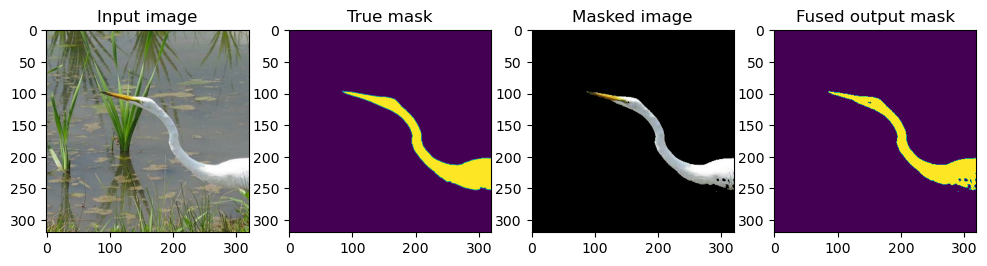

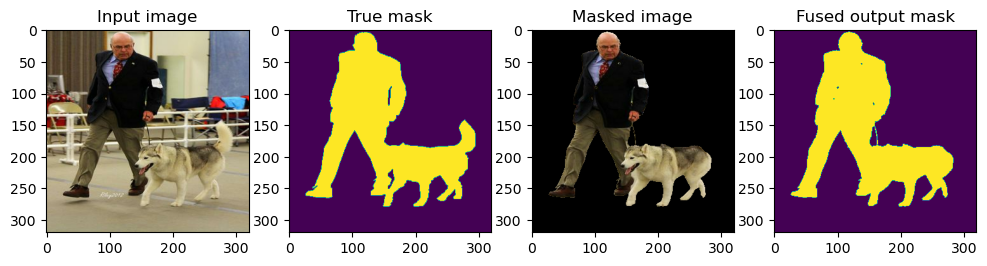

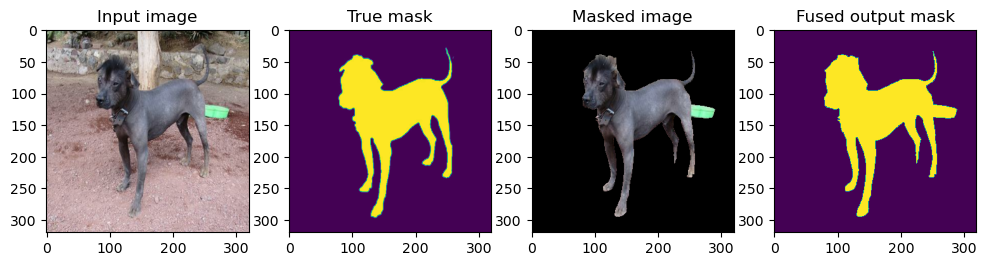

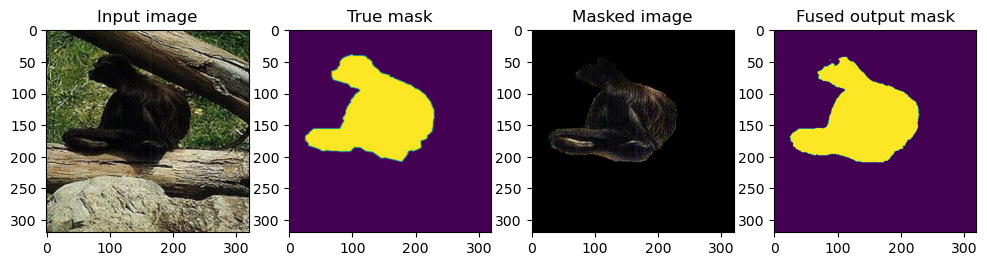

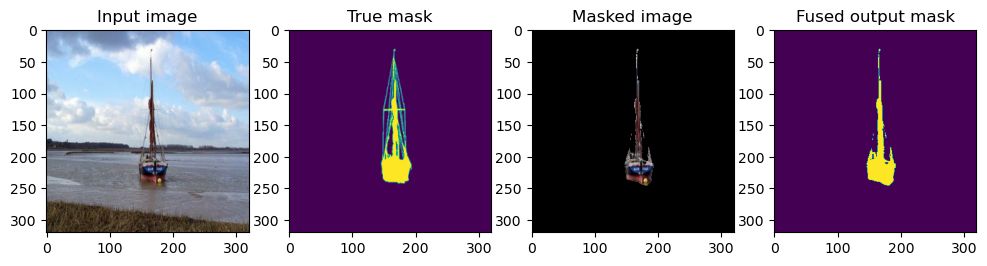

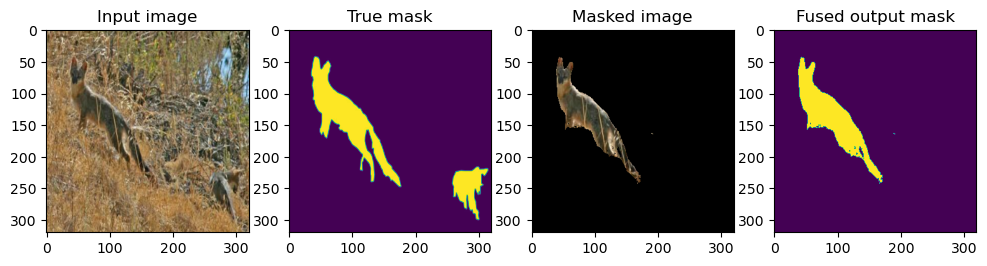

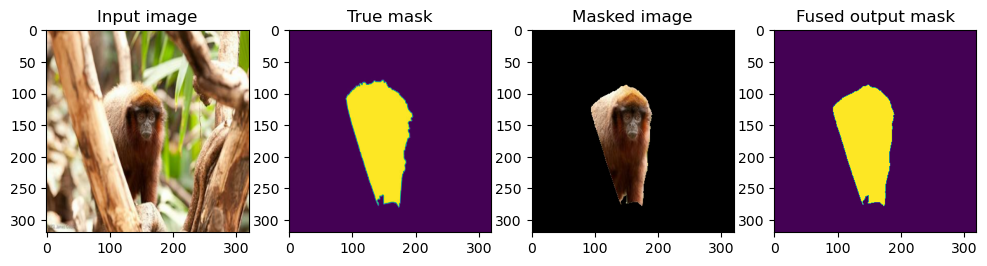

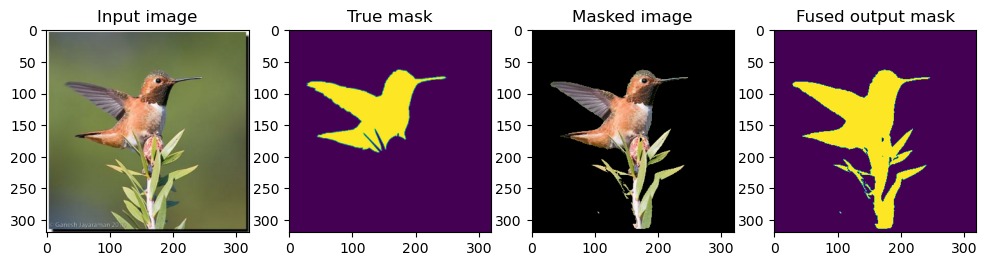

In [29]:
for image, mask in test_dataset.shuffle(80).take(1):
    out = model(image)
    for i in range(len(image)):
        out_mask = tf.math.round(out[0][i])
        display(
            [image[i], mask[i], np.multiply(image[i], out_mask), out_mask],
            ["Input image", "True mask", "Masked image", "Fused output mask"]
        )

In [19]:
saved_model = keras.models.load_model('./saved_models/u2net/best', 
                                      custom_objects={ "RoundedAccuracy": RoundedAccuracy, "RoundedMeanIoU": RoundedMeanIoU})

In [1]:
%load_ext tensorboard
%tensorboard --logdir ./logs